In [85]:
import pandas as pd
pd.options.mode.chained_assignment = None
import re
import numpy as np
from WorkforceSentimentMonitoring.data import get_data, merge, holdout, drop_wrong_language
from  WorkforceSentimentMonitoring.encoders import Preprocessor

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Load data into a single DataFrame
submission, train, test = get_data()
df = merge(submission, train, test)
df = drop_wrong_language(df, 'review')
target = [
    "work-balance",
    "culture-values",
    "career-opportunities",
    "comp-benefits",
    "senior-mgmt",
    "overall",
]

  0%|          | 0/10 [00:00<?, ?it/s]

Identifying entries in other languages...


 50%|█████     | 5/10 [04:00<04:00, 48.01s/it]

100%|██████████| 10/10 [04:48<00:00, 28.80s/it]


Drop 436 entries? [y] / n
y
Dropping 436 entries...


In [93]:
y = df.iloc[:, 4:-1]

X = df[['review']]

In [94]:
X

,review
0,Best Company to work for People are smart and ...
1,"Moving at the speed of light, burn out is inev..."
2,Great balance between big-company security and...
3,The best place I've worked and also the most d...
4,Execellent for engineers Impact driven. Best t...
...,...
52374,great place to grow! Great health benefits. Ma...
52375,An ocean of opportunities diverse set of peopl...
52376,Tech Gaint Equip its employees wid huge salari...
52377,Terrible They had great health benefits (no lo...


In [106]:
preprocessor = Preprocessor()
X = preprocessor.fit_transform(X)

In [107]:
X

,review
0,best company to work for people are smart and ...
1,moving at the speed of light burn out is inevi...
2,great balance between big company security and...
3,the best place i have worked and also the most...
4,execellent for engineer impact driven best tec...
...,...
52374,great place to grow great health benefit many ...
52375,an ocean of opportunity diverse set of people ...
52376,tech gaint equip it employee wid huge salary d...
52377,terrible they had great health benefit no long...


In [109]:
from WorkforceSentimentMonitoring.feature_engineering import get_emotion_score
from WorkforceSentimentMonitoring.data import get_lexicon

In [111]:
lexicon= get_lexicon()

In [113]:
X

,review
0,best company to work for people are smart and ...
1,moving at the speed of light burn out is inevi...
2,great balance between big company security and...
3,the best place i have worked and also the most...
4,execellent for engineer impact driven best tec...
...,...
52374,great place to grow great health benefit many ...
52375,an ocean of opportunity diverse set of people ...
52376,tech gaint equip it employee wid huge salary d...
52377,terrible they had great health benefit no long...


In [114]:
X = get_emotion_score(X, lexicon)

100%|██████████| 52379/52379 [02:01<00:00, 430.90it/s]


In [115]:
X

,review,length,anger_score,anticipation_score,disgust_score,fear_score,joy_score,sadness_score,surprise_score,trust_score
0,best company to work for people are smart and ...,15,0.000000,0.145991,0.000000,0.000000,0.183044,0.088423,0.000000,0.270045
1,moving at the speed of light burn out is inevi...,748,0.256168,0.319034,0.130056,0.230920,0.440615,0.376760,0.106000,0.575507
2,great balance between big company security and...,847,0.245966,0.369858,0.085294,0.286168,0.462127,0.183175,0.243154,0.500899
3,the best place i have worked and also the most...,881,0.107186,0.205583,0.032396,0.107756,0.325636,0.069040,0.136664,0.398452
4,execellent for engineer impact driven best tec...,19,0.000000,0.000000,0.000000,0.000000,0.000000,0.157559,0.000000,0.115130
...,...,...,...,...,...,...,...,...,...,...
52374,great place to grow great health benefit many ...,36,0.039199,0.243494,0.000000,0.047487,0.137652,0.124219,0.000000,0.315161
52375,an ocean of opportunity diverse set of people ...,46,0.238733,0.051231,0.078152,0.238083,0.110683,0.235398,0.000000,0.232239
52376,tech gaint equip it employee wid huge salary d...,28,0.000000,0.078221,0.000000,0.000000,0.057872,0.000000,0.013140,0.242672
52377,terrible they had great health benefit no long...,103,0.217094,0.181716,0.181878,0.352476,0.176846,0.202039,0.055338,0.315509


In [116]:
import matplotlib.pyplot as plt

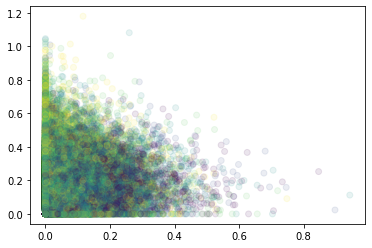

In [124]:
plt.scatter(x='anger_score', y = 'joy_score', data=X,
            c=y['overall'], alpha=0.1)


In [155]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [128]:
X.drop(columns='review', inplace=True)

In [132]:
scaler = MinMaxScaler()
X['length'] = scaler.fit_transform(X[['length']])

In [135]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y['overall'])

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

In [141]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2737791723867425

In [144]:
mapping = {1 : 0,
           2 : 0,
           3 : 1,
           4 : 2,
           5 : 2}
y_three = y.replace(mapping)

In [150]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y_three['overall'])
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)

In [151]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.4125076640098099

In [156]:
for target in y_three.columns:
    rus = RandomUnderSampler(random_state=0)
    X_resampled, y_resampled = rus.fit_resample(X, y_three[target])
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    report = classification_report(y_test,preds)
    print(report)

              precision    recall  f1-score   support

           0       0.49      0.44      0.46      3156
           1       0.37      0.28      0.32      3117
           2       0.41      0.56      0.47      3187

    accuracy                           0.42      9460
   macro avg       0.42      0.42      0.42      9460
weighted avg       0.42      0.42      0.42      9460

              precision    recall  f1-score   support

           0       0.55      0.50      0.52      2278
           1       0.37      0.25      0.30      2198
           2       0.44      0.62      0.52      2213

    accuracy                           0.46      6689
   macro avg       0.45      0.46      0.45      6689
weighted avg       0.45      0.46      0.45      6689

              precision    recall  f1-score   support

           0       0.50      0.48      0.49      2333
           1       0.36      0.15      0.21      2339
           2       0.41      0.66      0.50      2324

    accuracy        